In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from sklearn.utils import shuffle
from tensorflow import keras
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical

In [47]:
train_dir = '../data/seg_train'
test_dir = '../data/seg_validation'
pred_dir = '../data/seg_pred'

IMAGE_SIZE = (150,150)

In [48]:
# assign class labels
class_names = ['buildings','forest','glacier','mountain','sea','street']
class_labels = {class_name:i for i, class_name in enumerate(class_names)}
print(class_labels)

number_classes = len(class_names)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [49]:
for folder in os.listdir(train_dir):
    files_path = []
    for file in os.listdir(os.path.join(train_dir,folder)):
        files_path.append(file)
    print(len(files_path))

2271
2191
2404
2382
2512
2274


In [50]:
def load_dataset():
    datasets = [train_dir, test_dir]
    output = []
    
    for dataset in datasets:
        
        images1 = []
        labels1 = []
        print(f"loading {dataset}")
        
        for folder in os.listdir(dataset):

            label = class_labels[folder]
            for file in os.listdir(os.path.join(dataset,folder)):
                image_path = os.path.join(os.path.join(dataset, folder), file)

                image_file = cv2.imread(image_path)
                image_file = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
                image_file = cv2.resize(image_file, IMAGE_SIZE)
                
                images1.append(image_file)
                labels1.append(label)
                

        images1 = np.array(images1, dtype = 'float32')
        labels1 = np.array(labels1, dtype = 'int32')
        
        output.append((images1, labels1))
        print("Images file have been loaded")
                
    return output 

In [51]:
((train_images, train_labels), (test_images, test_labels)) = load_dataset()

loading ../data/seg_train
Images file have been loaded
loading ../data/seg_validation
Images file have been loaded


In [52]:
print("train dataset size")
len(train_images), len(train_labels)

train dataset size


(14034, 14034)

In [53]:
print("test dataset size")
len(test_images), len(test_labels)

test dataset size


(3000, 3000)

In [54]:
# shape of image dataset is 4D tensors
train_images.shape, test_images.shape

((14034, 150, 150, 3), (3000, 150, 150, 3))

In [55]:
train_labels.shape, test_labels.shape

((14034,), (3000,))

In [56]:
(train_images, train_labels) = shuffle(train_images, train_labels, random_state=45)

In [57]:
(test_images, test_labels) = shuffle(test_images, test_labels, random_state=45)

In [58]:
train_images = train_images[:7000]
train_labels = train_labels[:7000]

In [59]:
test_images = test_images[:1400]
test_labels = test_labels[:1400]

In [ ]:
train_images_norm = train_images/255.0
test_images_norm = test_images/255.0

In [ ]:
train_images.shape

In [ ]:
# model architecture of first keras model
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,240,518 (4.73 MB)

 Trainable params: 1,240,518 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
test_images_norm.shape, test_labels.shape

((1400, 150, 150, 3), (1400,))

In [22]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(train_images_norm, train_labels, batch_size=128, epochs=10, validation_data=(test_images_norm, test_labels))

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.6960 - loss: 0.8039 - val_accuracy: 0.7264 - val_loss: 0.7485
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7532 - loss: 0.6661 - val_accuracy: 0.7586 - val_loss: 0.6685
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.7854 - loss: 0.5836 - val_accuracy: 0.7536 - val_loss: 0.6483
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.7940 - loss: 0.5694 - val_accuracy: 0.7479 - val_loss: 0.6916
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.8308 - loss: 0.4588 - val_accuracy: 0.7429 - val_loss: 0.6761
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8644 - loss: 0.3794 - val_accuracy: 0.7743 - val_loss: 0.6159
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.8790 - loss: 0.3301 - val_accuracy: 0.7657 - val_loss: 0.6475
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9210 - loss: 0.2429 - val_accuracy: 0.7650 - va

In [27]:
test_loss, test_acc = model.evaluate(test_images_norm, test_labels, verbose=0)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

Test Loss 0.7609966397285461
Test Accuracy 0.7807142734527588


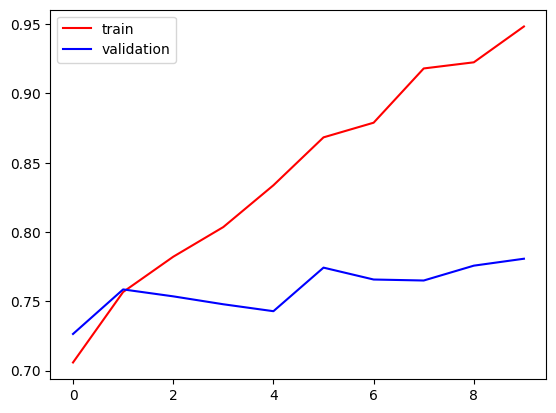

In [28]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

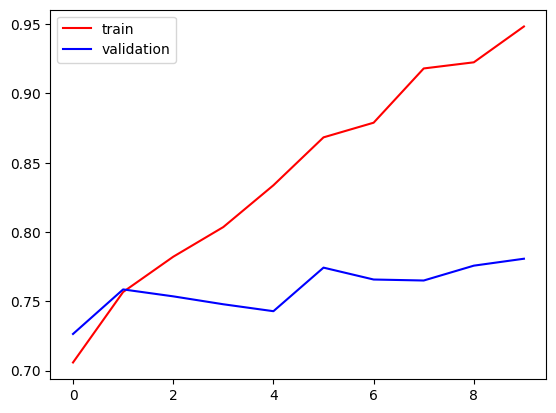

In [29]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [30]:
def getImagePaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

images_paths = getImagePaths(pred_dir)
len(images_paths)

7301

In [35]:
file_array = []

for file in images_paths[20:29]:
    files = cv2.imread(file)/255.0 
    file_array.append(files)
    
file_array = np.array(file_array)

In [36]:
predictions = model.predict(file_array)
predictions.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(9, 6)

In [37]:
preds_index = np.argmax(predictions, axis=1)
preds_index

array([0, 2, 0, 5, 5, 0, 5, 1, 0])

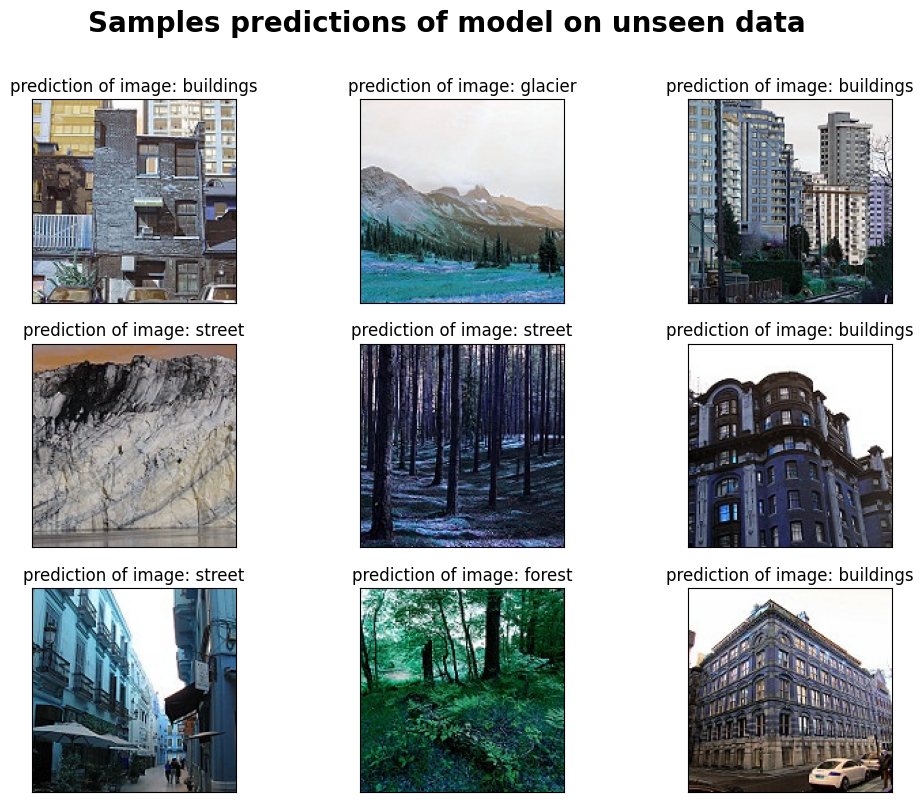

In [45]:
# Prediciton on unseen data using model
plt.figure(figsize=(12,9))

for idx, i in enumerate(preds_index):
    plt.subplot(3,3, idx+1)
    plt.imshow(file_array[idx])
    plt.title(f"prediction of image: {class_names[i]}")
    plt.xticks([])
    plt.yticks([])
    
plt.suptitle("Samples predictions of model on unseen data", size=20, weight='bold')
plt.show()